In [60]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import pandas as pd
import os


In [61]:
IMAGE_PATH = 'Original_PID/PID1.png'

In [62]:
input_dir = 'datasets/newmaplol/images/train'
output_dir = 'processed/'

In [63]:
# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Scaling factor (e.g., 2x)
scale_percent = 200  # 200% or 2x

# Iterate through the PNG files in the input directory
for filename in os.listdir(input_dir):
    if filename.endswith('.png'):
        # Load the input image
        input_path = os.path.join(input_dir, filename)
        img = cv2.imread(input_path)

        # Calculate the new dimensions for scaling
        width = int(img.shape[1] * scale_percent / 100)
        height = int(img.shape[0] * scale_percent / 100)
        new_dimensions = (width, height)

        # Resize the image without denoising
        resized_img = cv2.resize(img, new_dimensions, interpolation=cv2.INTER_LINEAR)

        # Save the upscaled image to the output directory
        output_path = os.path.join(output_dir, filename)
        cv2.imwrite(output_path, resized_img)

print("Image upscaling completed and saved to folder {output_dir}")

Image upscaling completed.


In [45]:
reader = easyocr.Reader(['en'], gpu=False)
result = reader.readtext(IMAGE_PATH,paragraph="False")
result_df = pd.DataFrame(result)
result_df.head()

TypeError: Reader.__init__() got an unexpected keyword argument 'min_score'

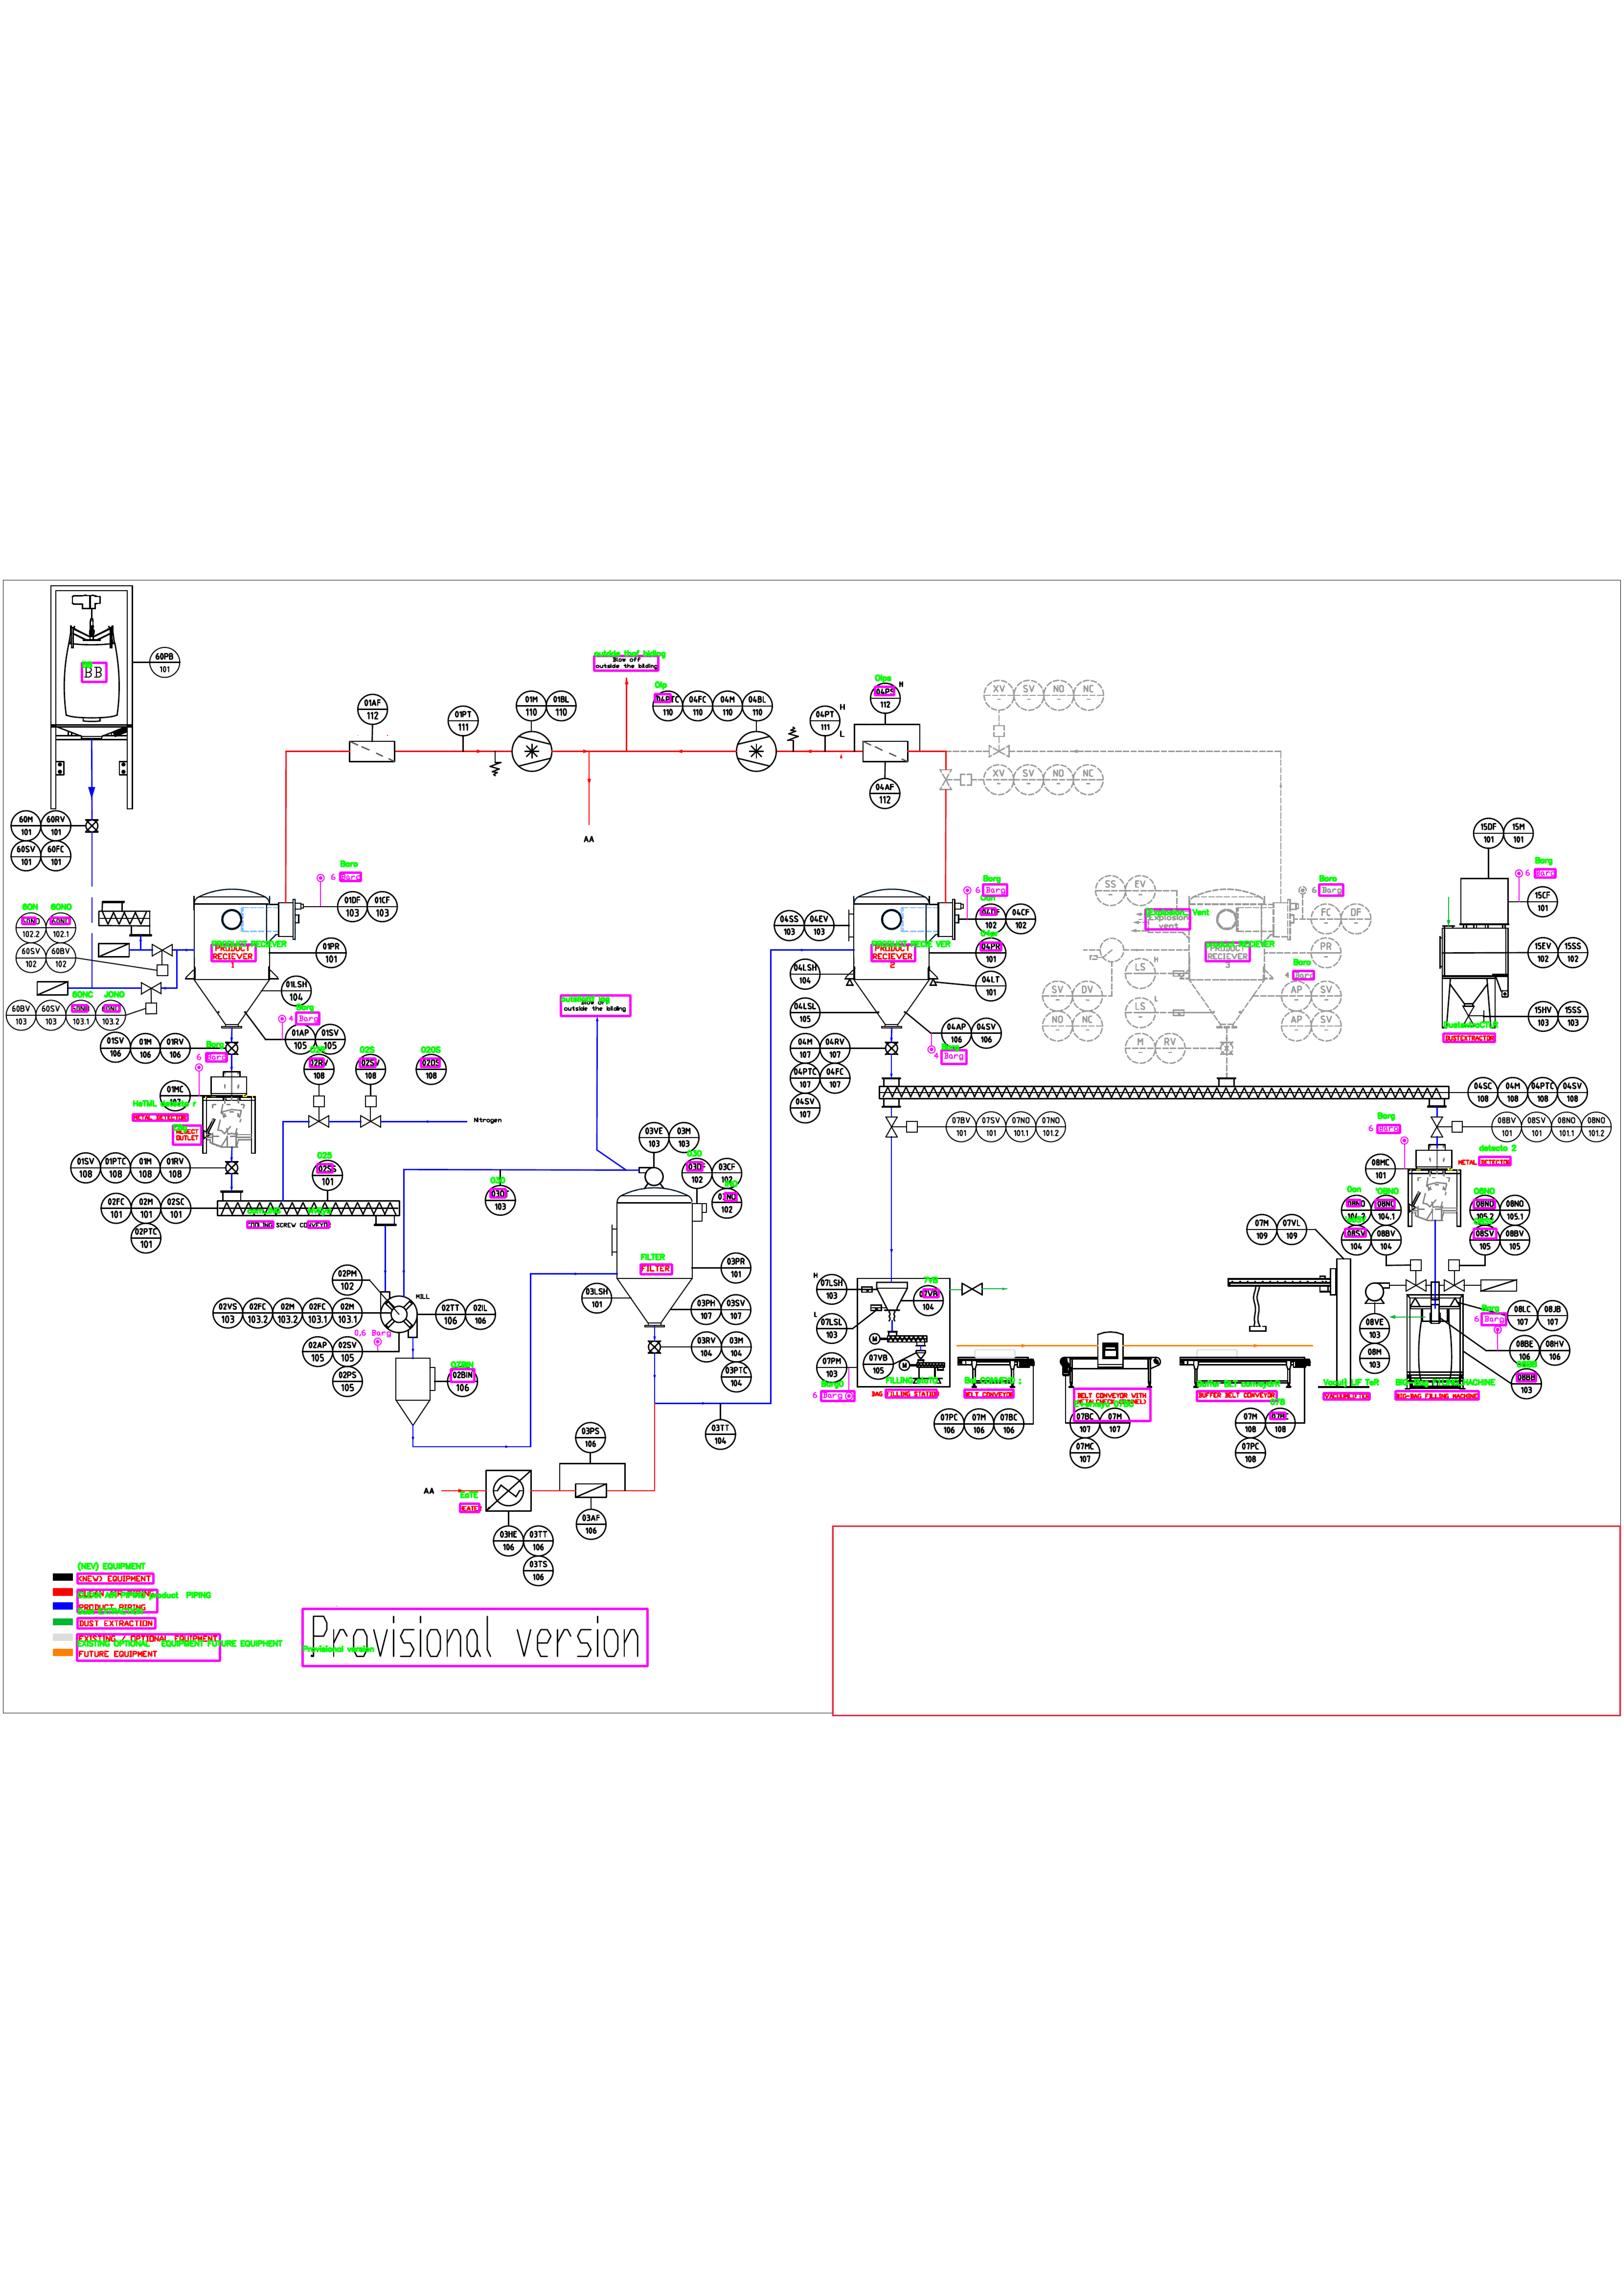

In [39]:
img = cv2.imread(IMAGE_PATH)
# result = reader.readtext(IMAGE_PATH)

for detection in result:
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    
    # Draw a bounding box around the detected text
    img = cv2.rectangle(img, top_left, bottom_right, (255, 0, 255), 3)
    
    # Calculate the text position beneath the bounding box
    text_position = (top_left[0], bottom_right[1] - 30)  # Adjust the vertical position as needed
    
    # Display the detected text beneath the bounding box
    img = cv2.putText(img, text, text_position, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2, cv2.LINE_AA)

plt.figure(figsize=(100, 100))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying with matplotlib
plt.axis('off')  # Hide the axis
plt.show()